In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans


In [2]:
all_responses = pd.read_csv("Human_Evaluation.csv")
all_responses.head()


Concept  \
0                               Big O notation   
1                                   Darkforest   
2                                  NP-hardness   
3  Selective Linear Definite Clause Resolution   
4                      algorithmic probability   

                               Prompt 1(Q1 baseline)  \
0  Big O notation is a way to describe how the am...   
1  Dark Forest (concept): A metaphor from Liu Cix...   
2  NP-hardness is a way to describe how tough a p...   
3  Selective Linear Definite Clause Resolution (S...   
4  Algorithmic probability is a theoretical way t...   

                           Prompt 2(Q1 multi_aspect)  \
0  Big O notation is a way to describe how an alg...   
1  Darkforest (Dark Forest)\n\n- Basic meaning: A...   
2  NP-hardness\n\n- Basic meaning: A problem is N...   
3  Selective Linear Definite Clause Resolution (S...   
4  Algorithmic probability (also called Solomonof...   

                                  Prompt 3(Q1 5step)  \
0  1) One-sentence definition\nBig O notation exp...   
1  1. One-sentence definition: Dark Forest is a s...   
2  1. One-sentence definition: NP-hardness means ...   
3  1. One-sentence definition\nSelective Linear D...   
4  1) One-sentence definition\nAlgorithmic probab...   

                                 Prompt 4(Q1 casual)  \
0  Big O notation is a simple way to say how the ...   
1  Darkforest (or “dark forest”) isn’t a strict A...   
2  NP-hardness is basically the “hardest of the h...   
3  Think of Selective Linear Definite Clause Reso...   
4  Algorithmic probability is a way to say: how l...   

                               Prompt 5(Q1 academic)  \
0  Definition and purpose\n- Let f, g: N → R_+ de...   
1  Darkforest (DF) is an AI-adjacent term borrowe...   
2  Definition. Let A ⊆ Σ* be a decision problem (...   
3  Selective Linear Definite Clause Resolution (S...   
4  - Definition: Algorithmic probability, or Solo...   

                               Prompt 6(p1 improved)  \
0  1) Everyday analogy: Think of checking items i...   
1  1) Everyday analogy: Imagine a dark forest at ...   
2  1) Everyday analogy: Think of planning a road ...   
3  Analogy: It’s like solving a mystery by follow...   
4  1) Everyday analogy: Imagine a kitchen with ma...   

                               Prompt 7(p2 improved)  \
0  - Basic idea: Big O notation is a simple way t...   
1  - Basic idea in one sentence: Dark Forest in A...   
2  - Basic idea (one sentence): NP-hard means the...   
3  - Basic idea (one sentence): SLD resolution is...   
4  - Basic idea (one sentence): Algorithmic proba...   

                               Prompt 8(p3 improved)  \
0  1) One-sentence definition: Big O notation des...   
1  1) One-sentence definition: Dark Forest is the...   
2  1) One-sentence definition\nNP-hard means ever...   
3  1) One-sentence definition:\nSelective Linear ...   
4  1) One-sentence definition\nAlgorithmic probab...   

                               Prompt 9(p4 improved)  \
0  - Definition: Big O notation is a simple way t...   
1  - Definition: Darkforest is a way to picture h...   
2  - Definition: NP-hardness means this problem i...   
3  - Definition: Selective Linear Definite Clause...   
4  - Definition: algorithmic probability is a way...   

                              Prompt 10(p5 improved)  
0  1) High-level idea\n- Big O describes how runt...  
1  Sections\n\n1) High-level idea\n- DarkForest i...  
2  High-level idea\n- NP-hard problems are among ...  
3  Sections: Selective Linear Definite Clause Res...  
4  1) High-level idea\n- Algorithmic probability ...

In [3]:
pwd

'c:\\Users\\jessi\\OneDrive\\Documents\\GitHub\\Judging-the-Judges\\analyze'

In [4]:
human_ranking = json.load(open(r"c:\\Users\\jessi\\OneDrive\\Documents\\GitHub\\Judging-the-Judges\result\human_eval_rankings.json"))["ranking"]
hr = pd.DataFrame(human_ranking)
hr.set_index("rank",inplace=True)
hr

prompt   average
rank                                      
1                baseline_round2  7.125000
2            level2_multi_aspect  6.803571
3                         casual  6.633929
4     level2_multi_aspect_round2  6.607143
5                  casual_round2  6.187500
6                         5steps  5.982143
7                   5step_round2  5.723214
8                       baseline  5.410714
9                academic_round2  3.375000
10                      academic  1.133929

In [5]:
llm_ranking = json.load(open(r"c:\Users\jessi\OneDrive\Documents\GitHub\Judging-the-Judges\result\elo_ratings.json"))['ranking']
lr = pd.DataFrame(llm_ranking)
lr.set_index("rank",inplace=True)
lr

Prompt      elo
rank                                        
1        level2_multi_aspect_round2  1954.26
2                     casual_round2  1939.70
3                            casual  1933.70
4               level2_multi_aspect  1614.65
5                   baseline_round2  1583.77
6                      5step_round2  1486.98
7                          baseline  1436.33
8                            5steps  1295.80
9     Highly_formal_academic_round2   998.59
10                         academic   756.23

In [6]:
llm_each_round = []
with open(r"c:\Users\jessi\OneDrive\Documents\GitHub\Judging-the-Judges\result\evaluation_results.jsonl", "r") as f:
    for line in f:
        llm_each_round.append(json.loads(line))
llm_each_round


[{'Term': 'Big O notation',
  'Major': 'Artificial Intelligence',
  'Comparison': '5steps vs academic',
  'Prompt_A': '5steps',
  'Prompt_B': 'academic',
  'Explanation_A': "1) One-sentence definition\nBig O notation expresses how the worst-case running time or memory usage of an algorithm grows as input size n increases, focusing on the dominant term and ignoring constants.\n\n2) Simple intuition based on the definition\nAs inputs get larger, the growth pattern matters more than exact timings. Constant factors and small terms fade away, so two algorithms with the same growth rate feel similar for large n.\n\n3) Key components of the topic and related concepts\nn = input size; T(n) = time/space. Common classes: O(1), O(log n), O(n), O(n log n), O(n^2). Worst-case focus. Related concepts: Theta (tight bound), Omega (lower bound).\n\n4) Clear real-world analogy\nAnalogy: finding a book on a shelf. If you know the exact position, it's O(1). If you scan left to right, it's O(n). If the she

In [7]:
# find the best response (highest score or highest win rate) for each vocabulary

# Method 1: Based on LLM pairwise comparison win rates
from collections import defaultdict

# Calculate win rates per term from LLM evaluations
term_win_rates = defaultdict(lambda: defaultdict(lambda: {'wins': 0, 'losses': 0, 'ties': 0, 'total': 0}))

for result in llm_each_round:
    term = result.get('Term', '')
    prompt_a = result.get('Prompt_A', '')
    prompt_b = result.get('Prompt_B', '')
    winner = result.get('Winner', '').upper()
    
    if not term or not prompt_a or not prompt_b:
        continue
    
    # Count outcomes
    if winner == 'A':
        term_win_rates[term][prompt_a]['wins'] += 1
        term_win_rates[term][prompt_b]['losses'] += 1
    elif winner == 'B':
        term_win_rates[term][prompt_b]['wins'] += 1
        term_win_rates[term][prompt_a]['losses'] += 1
    elif winner == 'TIE':
        term_win_rates[term][prompt_a]['ties'] += 1
        term_win_rates[term][prompt_b]['ties'] += 1
    
    term_win_rates[term][prompt_a]['total'] += 1
    term_win_rates[term][prompt_b]['total'] += 1

# Calculate win rates for each term-prompt combination
term_best_prompts_llm = {}
for term, prompts in term_win_rates.items():
    best_prompt = None
    best_win_rate = -1
    
    for prompt, stats in prompts.items():
        if stats['total'] > 0:
            # Win rate = (wins + 0.5*ties) / total
            win_rate = (stats['wins'] + 0.5 * stats['ties']) / stats['total']
            if win_rate > best_win_rate:
                best_win_rate = win_rate
                best_prompt = prompt
    
    if best_prompt:
        term_best_prompts_llm[term] = {
            'prompt': best_prompt,
            'win_rate': best_win_rate,
            'wins': prompts[best_prompt]['wins'],
            'losses': prompts[best_prompt]['losses'],
            'ties': prompts[best_prompt]['ties'],
            'total': prompts[best_prompt]['total']
        }

# Convert to DataFrame for easier viewing
llm_best_df = pd.DataFrame([
    {
        'Term': term,
        'Best_Prompt': data['prompt'],
        'Win_Rate': round(data['win_rate'], 3),
        'Wins': data['wins'],
        'Losses': data['losses'],
        'Ties': data['ties'],
        'Total_Comparisons': data['total']
    }
    for term, data in term_best_prompts_llm.items()
]).sort_values('Term')

print("Best prompt per term (based on LLM win rates):")
print("=" * 80)
print(llm_best_df.to_string(index=False))
print(f"\nTotal terms analyzed: {len(llm_best_df)}")


Best prompt per term (based on LLM win rates):
                                       Term                Best_Prompt  Win_Rate  Wins  Losses  Ties  Total_Comparisons
                             Big O notation              casual_round2     1.000     9       0     0                  9
                                 Darkforest              casual_round2     0.944     8       0     1                  9
                                NP-hardness level2_multi_aspect_round2     1.000     9       0     0                  9
Selective Linear Definite Clause Resolution level2_multi_aspect_round2     1.000     9       0     0                  9
                    agent-based model (ABM)              casual_round2     1.000     9       0     0                  9
                    algorithmic probability level2_multi_aspect_round2     1.000     9       0     0                  9
                  behavior informatics (BI) level2_multi_aspect_round2     1.000     9       0     0             

In [8]:
all_responses.shape[1]

11

In [9]:
all_responses.columns = ['concept'] + ['baseline','level2_multi_aspect','5steps','casual','academic','baseline_round2','level2_multi_aspect_round2','5step_round2','casual_round2','academic_round2']
all_responses.head()

concept  \
0                               Big O notation   
1                                   Darkforest   
2                                  NP-hardness   
3  Selective Linear Definite Clause Resolution   
4                      algorithmic probability   

                                            baseline  \
0  Big O notation is a way to describe how the am...   
1  Dark Forest (concept): A metaphor from Liu Cix...   
2  NP-hardness is a way to describe how tough a p...   
3  Selective Linear Definite Clause Resolution (S...   
4  Algorithmic probability is a theoretical way t...   

                                 level2_multi_aspect  \
0  Big O notation is a way to describe how an alg...   
1  Darkforest (Dark Forest)\n\n- Basic meaning: A...   
2  NP-hardness\n\n- Basic meaning: A problem is N...   
3  Selective Linear Definite Clause Resolution (S...   
4  Algorithmic probability (also called Solomonof...   

                                              5steps  \
0  1) One-sentence definition\nBig O notation exp...   
1  1. One-sentence definition: Dark Forest is a s...   
2  1. One-sentence definition: NP-hardness means ...   
3  1. One-sentence definition\nSelective Linear D...   
4  1) One-sentence definition\nAlgorithmic probab...   

                                              casual  \
0  Big O notation is a simple way to say how the ...   
1  Darkforest (or “dark forest”) isn’t a strict A...   
2  NP-hardness is basically the “hardest of the h...   
3  Think of Selective Linear Definite Clause Reso...   
4  Algorithmic probability is a way to say: how l...   

                                            academic  \
0  Definition and purpose\n- Let f, g: N → R_+ de...   
1  Darkforest (DF) is an AI-adjacent term borrowe...   
2  Definition. Let A ⊆ Σ* be a decision problem (...   
3  Selective Linear Definite Clause Resolution (S...   
4  - Definition: Algorithmic probability, or Solo...   

                                     baseline_round2  \
0  1) Everyday analogy: Think of checking items i...   
1  1) Everyday analogy: Imagine a dark forest at ...   
2  1) Everyday analogy: Think of planning a road ...   
3  Analogy: It’s like solving a mystery by follow...   
4  1) Everyday analogy: Imagine a kitchen with ma...   

                          level2_multi_aspect_round2  \
0  - Basic idea: Big O notation is a simple way t...   
1  - Basic idea in one sentence: Dark Forest in A...   
2  - Basic idea (one sentence): NP-hard means the...   
3  - Basic idea (one sentence): SLD resolution is...   
4  - Basic idea (one sentence): Algorithmic proba...   

                                        5step_round2  \
0  1) One-sentence definition: Big O notation des...   
1  1) One-sentence definition: Dark Forest is the...   
2  1) One-sentence definition\nNP-hard means ever...   
3  1) One-sentence definition:\nSelective Linear ...   
4  1) One-sentence definition\nAlgorithmic probab...   

                                       casual_round2  \
0  - Definition: Big O notation is a simple way t...   
1  - Definition: Darkforest is a way to picture h...   
2  - Definition: NP-hardness means this problem i...   
3  - Definition: Selective Linear Definite Clause...   
4  - Definition: algorithmic probability is a way...   

                                     academic_round2  
0  1) High-level idea\n- Big O describes how runt...  
1  Sections\n\n1) High-level idea\n- DarkForest i...  
2  High-level idea\n- NP-hard problems are among ...  
3  Sections: Selective Linear Definite Clause Res...  
4  1) High-level idea\n- Algorithmic probability ...

In [10]:
llm_best_df.head()

Term                 Best_Prompt  \
0                                Big O notation               casual_round2   
1                                    Darkforest               casual_round2   
2                                   NP-hardness  level2_multi_aspect_round2   
3   Selective Linear Definite Clause Resolution  level2_multi_aspect_round2   
10                      agent-based model (ABM)               casual_round2   

    Win_Rate  Wins  Losses  Ties  Total_Comparisons  
0      1.000     9       0     0                  9  
1      0.944     8       0     1                  9  
2      1.000     9       0     0                  9  
3      1.000     9       0     0                  9  
10     1.000     9       0     0                  9

In [11]:
# Extract best explanations from Human_Evaluation.csv based on LLM best prompts
# Match by term/concept name (case-insensitive) instead of assuming row alignment

best_explanations = {}

# Create a lookup dictionary from all_responses: concept -> row data
concept_to_row = {}
for idx, row in all_responses.iterrows():
    concept = str(row['concept']).strip()
    if concept:
        concept_to_row[concept.lower()] = row

# Match terms from llm_best_df with concepts in all_responses
matched_count = 0
not_found = []

for idx, row in llm_best_df.iterrows():
    term = str(row['Term']).strip()
    best_prompt = str(row['Best_Prompt']).strip()
    
    # Try to find matching concept (case-insensitive)
    term_lower = term.lower()
    if term_lower in concept_to_row:
        csv_row = concept_to_row[term_lower]
        
        # Get the explanation from the best prompt column
        if best_prompt in csv_row.index:
            explanation = csv_row[best_prompt]
            if pd.notna(explanation) and str(explanation).strip():
                best_explanations[term] = str(explanation).strip()
                matched_count += 1
            else:
                not_found.append(f"{term} (empty explanation for {best_prompt})")
        else:
            not_found.append(f"{term} (prompt '{best_prompt}' not found in CSV columns)")
    else:
        not_found.append(f"{term} (concept not found in CSV)")

print(f"✅ Matched {matched_count} out of {len(llm_best_df)} terms")
if not_found:
    print(f"\n⚠️  {len(not_found)} terms not found or missing data:")
    for item in not_found[:10]:  # Show first 10
        print(f"   - {item}")
    if len(not_found) > 10:
        print(f"   ... and {len(not_found) - 10} more")

print(f"\n📊 Sample of matched explanations:")

df = pd.DataFrame(list(best_explanations.items()), columns=["term", "explanation"])
df.head()

✅ Matched 29 out of 29 terms

📊 Sample of matched explanations:


term  \
0                               Big O notation   
1                                   Darkforest   
2                                  NP-hardness   
3  Selective Linear Definite Clause Resolution   
4                      agent-based model (ABM)   

                                         explanation  
0  - Definition: big O notation is a simple way t...  
1  - Definition: Darkforest is a way to picture h...  
2  - Basic idea (one sentence): NP-hard means the...  
3  - Basic idea (one sentence): SLD resolution is...  
4  - Definition: An agent-based model (ABM) is a ...

In [12]:
# Calculate text similarity using TF-IDF and cosine similarity
terms_list = df['term'].tolist()
explanations_list = df['explanation'].tolist()

# Create TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(explanations_list)

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)

print(f"Similarity matrix shape: {similarity_matrix.shape}")
print(f"Average similarity: {np.mean(similarity_matrix[np.triu_indices(len(terms_list), k=1)]):.3f}")
print(f"Max similarity: {np.max(similarity_matrix[np.triu_indices(len(terms_list), k=1)]):.3f}")
print(f"Min similarity: {np.min(similarity_matrix[np.triu_indices(len(terms_list), k=1)]):.3f}")

Similarity matrix shape: (29, 29)
Average similarity: 0.025
Max similarity: 0.229
Min similarity: 0.000


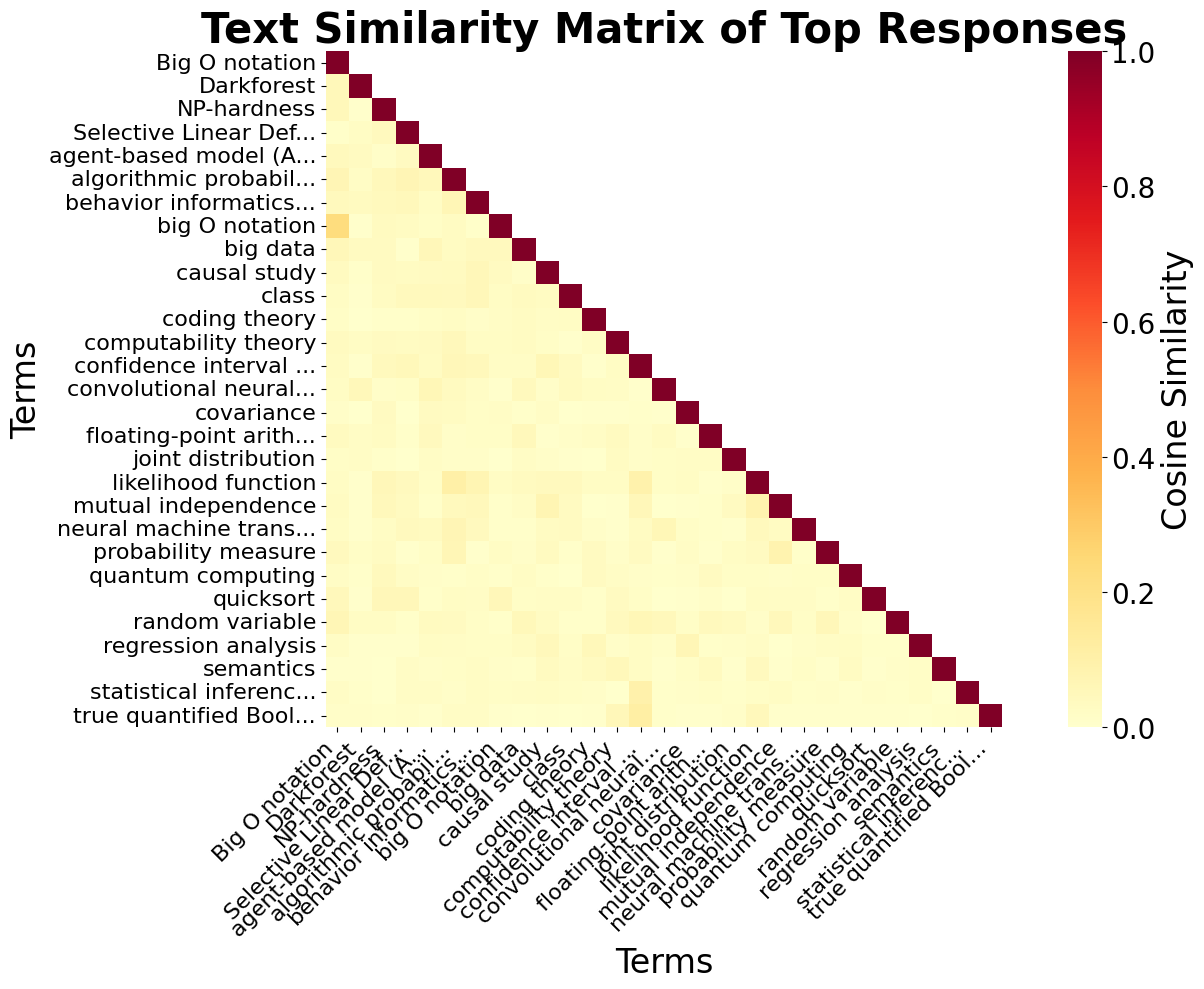

In [53]:
# Visualize similarity matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(similarity_matrix, dtype=bool), k=1)
sns.heatmap(similarity_matrix, 
            xticklabels=[t[:20] + '...' if len(t) > 20 else t for t in terms_list],
            yticklabels=[t[:20] + '...' if len(t) > 20 else t for t in terms_list],
            cmap='YlOrRd', 
            annot=False,
            mask=mask,
            square=True,
            cbar_kws={'label': 'Cosine Similarity'})
plt.title('Text Similarity Matrix of Top Responses', fontsize=14, fontweight='bold')
plt.xlabel('Terms', fontsize=12)
plt.ylabel('Terms', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [14]:
human_ranking

[{'prompt': 'baseline_round2', 'average': 7.125, 'rank': 1},
 {'prompt': 'level2_multi_aspect', 'average': 6.803571428571429, 'rank': 2},
 {'prompt': 'casual', 'average': 6.633928571428571, 'rank': 3},
 {'prompt': 'level2_multi_aspect_round2',
  'average': 6.607142857142857,
  'rank': 4},
 {'prompt': 'casual_round2', 'average': 6.1875, 'rank': 5},
 {'prompt': '5steps', 'average': 5.982142857142857, 'rank': 6},
 {'prompt': '5step_round2', 'average': 5.723214285714286, 'rank': 7},
 {'prompt': 'baseline', 'average': 5.410714285714286, 'rank': 8},
 {'prompt': 'academic_round2', 'average': 3.375, 'rank': 9},
 {'prompt': 'academic', 'average': 1.1339285714285714, 'rank': 10}]

In [15]:
# ============================================================================
# COMPARATIVE ANALYSIS: Human vs LLM Judge Preferences
# Analyzing lexical and structural patterns in high-scoring responses
# ============================================================================

import re
from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Download required NLTK data if not already present
# Try punkt_tab first (newer NLTK versions), then fallback to punkt
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    try:
        print("Downloading punkt_tab tokenizer...")
        nltk.download('punkt_tab', quiet=True)
    except:
        try:
            print("punkt_tab not available, trying punkt...")
            nltk.download('punkt', quiet=True)
        except Exception as e:
            print(f"Warning: Could not download punkt tokenizer: {e}")
            print("Will use fallback regex tokenization if needed.")

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Downloading stopwords...")
    nltk.download('stopwords', quiet=True)

# Get human-preferred prompts (top 3 by average score)
human_top_prompts = [item['prompt'] for item in human_ranking[:3]]
print("Human Top 3 Prompts (by average score):")
for i, prompt in enumerate(human_top_prompts, 1):
    score = next(item['average'] for item in human_ranking if item['prompt'] == prompt)
    print(f"  {i}. {prompt}: {score:.3f}")

# Get LLM-preferred prompts (top 3 by Elo rating)
# lr is a DataFrame with rank as index
# Check column names (could be 'Prompt' or 'prompt' depending on how DataFrame was created)
col_name = 'Prompt' if 'Prompt' in lr.columns else 'prompt'
elo_col = 'elo' if 'elo' in lr.columns else 'Elo'

llm_top_prompts = lr.head(3)[col_name].tolist()
print("\nLLM Top 3 Prompts (by Elo rating):")
for i, (rank, row) in enumerate(lr.head(3).iterrows(), 1):
    print(f"  {i}. {row[col_name]}: {row[elo_col]:.1f}")

# Identify common terms between human and LLM evaluations
print(f"\nAnalyzing patterns for {len(best_explanations)} terms...")

Human Top 3 Prompts (by average score):
  1. baseline_round2: 7.125
  2. level2_multi_aspect: 6.804
  3. casual: 6.634

LLM Top 3 Prompts (by Elo rating):
  1. level2_multi_aspect_round2: 1954.3
  2. casual_round2: 1939.7
  3. casual: 1933.7

Analyzing patterns for 29 terms...


In [16]:
# Extract human-preferred responses (using top human prompts)
human_preferred = {}
llm_preferred = {}

# Map prompt names to CSV column names
# Note: CSV columns were renamed in cell 9 to match prompt names
prompt_to_csv_col = {
    'baseline': 'baseline',
    'level2_multi_aspect': 'level2_multi_aspect',
    '5steps': '5steps',
    'casual': 'casual',
    'academic': 'academic',
    'baseline_round2': 'baseline_round2',
    'level2_multi_aspect_round2': 'level2_multi_aspect_round2',
    '5step_round2': '5step_round2',
    'casual_round2': 'casual_round2',
    'academic_round2': 'academic_round2'
}

# Debug: Check available columns in CSV
print("Available columns in all_responses:")
print(list(all_responses.columns)[:5], "...")
print(f"Total columns: {len(all_responses.columns)}")
print()

# Create lookup for human responses
concept_to_row = {}
for idx, row in all_responses.iterrows():
    concept = str(row['concept']).strip()
    if concept:
        concept_to_row[concept.lower()] = row

print(f"Created lookup for {len(concept_to_row)} concepts from CSV")
print(f"Human top prompts: {human_top_prompts}")
print()

# For each term, get human-preferred response (from top human prompt)
# and LLM-preferred response (already in best_explanations)
# Note: best_explanations[term] is just the explanation string
# We need to get prompt and win_rate from term_best_prompts_llm
not_found_in_csv = []
no_explanation = []

for term in best_explanations.keys():
    term_lower = term.lower()
    
    # Get LLM-preferred response
    # best_explanations[term] is the explanation string
    # Get prompt and win_rate from term_best_prompts_llm
    if term in term_best_prompts_llm:
        llm_preferred[term] = {
            'prompt': term_best_prompts_llm[term]['prompt'],
            'explanation': best_explanations[term],  # This is the explanation string
            'win_rate': term_best_prompts_llm[term]['win_rate']
        }
    else:
        # Fallback: if term not in term_best_prompts_llm, skip it
        continue
    
    # Get human-preferred response (from top human prompt)
    if term_lower in concept_to_row:
        csv_row = concept_to_row[term_lower]
        # Try to get response from top human prompt
        human_prompt = None
        human_explanation = None
        
        for prompt in human_top_prompts:
            csv_col = prompt_to_csv_col.get(prompt)
            if csv_col and csv_col in csv_row.index:
                explanation = csv_row[csv_col]
                if pd.notna(explanation) and str(explanation).strip():
                    human_prompt = prompt
                    human_explanation = str(explanation).strip()
                    break
        
        if human_explanation:
            human_preferred[term] = {
                'prompt': human_prompt,
                'explanation': human_explanation
            }
        else:
            no_explanation.append(term)
    else:
        not_found_in_csv.append(term)

print(f"✅ Human-preferred responses found: {len(human_preferred)}")
print(f"✅ LLM-preferred responses found: {len(llm_preferred)}")
print(f"✅ Common terms (both human and LLM): {len(set(human_preferred.keys()) & set(llm_preferred.keys()))}")
print()
if not_found_in_csv:
    print(f"⚠️  Terms not found in CSV: {len(not_found_in_csv)}")
    if len(not_found_in_csv) <= 10:
        print(f"   Examples: {', '.join(not_found_in_csv[:10])}")
    else:
        print(f"   Examples: {', '.join(not_found_in_csv[:10])} ... and {len(not_found_in_csv)-10} more")
if no_explanation:
    print(f"⚠️  Terms with no explanation in top human prompts: {len(no_explanation)}")
    if len(no_explanation) <= 10:
        print(f"   Examples: {', '.join(no_explanation[:10])}")
    else:
        print(f"   Examples: {', '.join(no_explanation[:10])} ... and {len(no_explanation)-10} more")

Available columns in all_responses:
['concept', 'baseline', 'level2_multi_aspect', '5steps', 'casual'] ...
Total columns: 11

Created lookup for 28 concepts from CSV
Human top prompts: ['baseline_round2', 'level2_multi_aspect', 'casual']

✅ Human-preferred responses found: 29
✅ LLM-preferred responses found: 29
✅ Common terms (both human and LLM): 29



In [17]:
# ============================================================================
# LEXICAL PATTERN ANALYSIS
# ============================================================================

def extract_lexical_features(text):
    """Extract lexical features from text"""
    if not text or pd.isna(text):
        return {}
    
    text = str(text)
    
    # Basic counts
    # Handle tokenization with error handling
    try:
        words = word_tokenize(text.lower())
        sentences = sent_tokenize(text)
    except LookupError:
        # Fallback: simple tokenization if NLTK resources not available
        import re
        words = re.findall(r'\b\w+\b', text.lower())
        sentences = re.split(r'[.!?]+', text)
        sentences = [s.strip() for s in sentences if s.strip()]
    
    words_clean = [w for w in words if w.isalnum()]
    
    # Vocabulary metrics
    unique_words = set(words_clean)
    vocab_diversity = len(unique_words) / len(words_clean) if words_clean else 0
    
    # Word length statistics
    word_lengths = [len(w) for w in words_clean]
    avg_word_length = np.mean(word_lengths) if word_lengths else 0
    
    # Sentence length statistics
    sentence_lengths = [len(word_tokenize(s)) for s in sentences]
    avg_sentence_length = np.mean(sentence_lengths) if sentence_lengths else 0
    
    # Stopword ratio
    stop_words = set(stopwords.words('english'))
    stopword_count = sum(1 for w in words_clean if w in stop_words)
    stopword_ratio = stopword_count / len(words_clean) if words_clean else 0
    
    # Punctuation counts
    punctuation_count = sum(1 for c in text if c in '.,!?;:')
    
    # Common n-grams (bigrams and trigrams)
    bigrams = [f"{words_clean[i]}_{words_clean[i+1]}" for i in range(len(words_clean)-1)]
    trigrams = [f"{words_clean[i]}_{words_clean[i+1]}_{words_clean[i+2]}" 
                for i in range(len(words_clean)-2)]
    
    return {
        'word_count': len(words_clean),
        'sentence_count': len(sentences),
        'vocab_diversity': vocab_diversity,
        'avg_word_length': avg_word_length,
        'avg_sentence_length': avg_sentence_length,
        'stopword_ratio': stopword_ratio,
        'punctuation_count': punctuation_count,
        'bigrams': bigrams,
        'trigrams': trigrams,
        'unique_words': unique_words
    }

# Extract lexical features for human and LLM preferred responses
human_lexical = {}
llm_lexical = {}

for term in set(human_preferred.keys()) & set(llm_preferred.keys()):
    human_lexical[term] = extract_lexical_features(human_preferred[term]['explanation'])
    llm_lexical[term] = extract_lexical_features(llm_preferred[term]['explanation'])

print(f"Extracted lexical features for {len(human_lexical)} common terms")

Extracted lexical features for 29 common terms


In [18]:
# ============================================================================
# STRUCTURAL PATTERN ANALYSIS
# ============================================================================

def extract_structural_features(text):
    """Extract structural features from text"""
    if not text or pd.isna(text):
        return {}
    
    text = str(text)
    
    # Paragraph structure
    paragraphs = [p.strip() for p in text.split('\n\n') if p.strip()]
    paragraph_count = len(paragraphs)
    
    # List/bullet points
    bullet_patterns = [r'^[-•*]\s', r'^\d+[.)]\s', r'^[a-z][.)]\s']
    bullet_count = sum(len(re.findall(pattern, line, re.MULTILINE)) 
                      for pattern in bullet_patterns for line in text.split('\n'))
    
    # Numbered lists
    numbered_list_count = len(re.findall(r'^\d+[.)]\s', text, re.MULTILINE))
    
    # Section headers (lines that are short and followed by content)
    lines = [l.strip() for l in text.split('\n') if l.strip()]
    potential_headers = sum(1 for i, line in enumerate(lines) 
                           if len(line) < 80 and i < len(lines) - 1 
                           and len(lines[i+1]) > 50)
    
    # Formatting markers
    has_colon_separators = ':' in text and text.count(':') > 2
    has_dashes = '—' in text or '--' in text
    has_parentheses = '(' in text and ')' in text
    
    # Code/math notation
    has_code_notation = bool(re.search(r'[A-Z]\([^)]+\)|O\([^)]+\)', text))
    
    # Question marks (interactive style)
    has_questions = '?' in text
    
    # Emphasis markers
    has_emphasis = bool(re.search(r'\*\*|__|_', text))
    
    return {
        'paragraph_count': paragraph_count,
        'bullet_count': bullet_count,
        'numbered_list_count': numbered_list_count,
        'potential_headers': potential_headers,
        'has_colon_separators': has_colon_separators,
        'has_dashes': has_dashes,
        'has_parentheses': has_parentheses,
        'has_code_notation': has_code_notation,
        'has_questions': has_questions,
        'has_emphasis': has_emphasis,
        'avg_paragraph_length': np.mean([len(p) for p in paragraphs]) if paragraphs else 0
    }

# Extract structural features
human_structural = {}
llm_structural = {}

for term in set(human_preferred.keys()) & set(llm_preferred.keys()):
    human_structural[term] = extract_structural_features(human_preferred[term]['explanation'])
    llm_structural[term] = extract_structural_features(llm_preferred[term]['explanation'])

print(f"Extracted structural features for {len(human_structural)} common terms")

Extracted structural features for 29 common terms


In [19]:
# ============================================================================
# COMPARATIVE STATISTICS: Human vs LLM Preferences
# ============================================================================

# Aggregate lexical features
lexical_features = ['word_count', 'sentence_count', 'vocab_diversity', 
                    'avg_word_length', 'avg_sentence_length', 'stopword_ratio', 
                    'punctuation_count']

comparison_stats = {}

for feature in lexical_features:
    human_vals = [human_lexical[t][feature] for t in human_lexical.keys() 
                  if feature in human_lexical[t]]
    llm_vals = [llm_lexical[t][feature] for t in llm_lexical.keys() 
                if feature in llm_lexical[t]]
    
    if human_vals and llm_vals:
        comparison_stats[feature] = {
            'human_mean': np.mean(human_vals),
            'human_std': np.std(human_vals),
            'llm_mean': np.mean(llm_vals),
            'llm_std': np.std(llm_vals),
            'difference': np.mean(human_vals) - np.mean(llm_vals),
            'relative_diff_pct': ((np.mean(human_vals) - np.mean(llm_vals)) / np.mean(llm_vals) * 100) if np.mean(llm_vals) > 0 else 0
        }

# Aggregate structural features
structural_features = ['paragraph_count', 'bullet_count', 'numbered_list_count', 
                       'potential_headers', 'avg_paragraph_length']

for feature in structural_features:
    human_vals = [human_structural[t][feature] for t in human_structural.keys() 
                  if feature in human_structural[t]]
    llm_vals = [llm_structural[t][feature] for t in llm_structural.keys() 
                if feature in llm_structural[t]]
    
    if human_vals and llm_vals:
        comparison_stats[feature] = {
            'human_mean': np.mean(human_vals),
            'human_std': np.std(human_vals),
            'llm_mean': np.mean(llm_vals),
            'llm_std': np.std(llm_vals),
            'difference': np.mean(human_vals) - np.mean(llm_vals),
            'relative_diff_pct': ((np.mean(human_vals) - np.mean(llm_vals)) / np.mean(llm_vals) * 100) if np.mean(llm_vals) > 0 else 0
        }

# Boolean structural features
boolean_features = ['has_colon_separators', 'has_dashes', 'has_parentheses', 
                   'has_code_notation', 'has_questions', 'has_emphasis']

for feature in boolean_features:
    human_vals = [human_structural[t][feature] for t in human_structural.keys() 
                  if feature in human_structural[t]]
    llm_vals = [llm_structural[t][feature] for t in llm_structural.keys() 
                if feature in llm_structural[t]]
    
    if human_vals and llm_vals:
        comparison_stats[feature] = {
            'human_pct': np.mean(human_vals) * 100,
            'llm_pct': np.mean(llm_vals) * 100,
            'difference_pct': (np.mean(human_vals) - np.mean(llm_vals)) * 100
        }

# Display comparison
print("=" * 100)
print("COMPARATIVE ANALYSIS: Human vs LLM Judge Preferences")
print("=" * 100)

comparison_df = pd.DataFrame([
    {
        'Feature': feat,
        'Human_Mean': stats.get('human_mean', stats.get('human_pct', 0)),
        'LLM_Mean': stats.get('llm_mean', stats.get('llm_pct', 0)),
        'Difference': stats.get('difference', stats.get('difference_pct', 0)),
        'Relative_Diff_%': stats.get('relative_diff_pct', stats.get('difference_pct', 0))
    }
    for feat, stats in comparison_stats.items()
])

print("\nLexical & Structural Feature Comparison:")
print(comparison_df.to_string(index=False))

COMPARATIVE ANALYSIS: Human vs LLM Judge Preferences

Lexical & Structural Feature Comparison:
             Feature  Human_Mean   LLM_Mean  Difference  Relative_Diff_%
          word_count  187.827586 116.724138   71.103448        60.915805
      sentence_count   11.482759   6.034483    5.448276        90.285714
     vocab_diversity    0.633235   0.696305   -0.063069        -9.057716
     avg_word_length    4.679893   4.505599    0.174295         3.868399
 avg_sentence_length   22.010040  26.278333   -4.268292       -16.242630
      stopword_ratio    0.376652   0.424230   -0.047578       -11.215221
   punctuation_count   32.448276  16.965517   15.482759        91.260163
     paragraph_count    5.034483   3.206897    1.827586        56.989247
        bullet_count    6.068966   2.896552    3.172414       109.523810
 numbered_list_count    4.137931   0.000000    4.137931         0.000000
   potential_headers    1.724138   0.448276    1.275862       284.615385
avg_paragraph_length  231.410

In [20]:
# ============================================================================
# VOCABULARY ANALYSIS: Most Common Words and N-grams
# ============================================================================

# Collect all words and n-grams from human and LLM preferred responses
human_all_words = []
human_all_bigrams = []
human_all_trigrams = []

llm_all_words = []
llm_all_bigrams = []
llm_all_trigrams = []

for term in set(human_lexical.keys()) & set(llm_lexical.keys()):
    if 'unique_words' in human_lexical[term]:
        human_all_words.extend(human_lexical[term]['unique_words'])
    if 'bigrams' in human_lexical[term]:
        human_all_bigrams.extend(human_lexical[term]['bigrams'])
    if 'trigrams' in human_lexical[term]:
        human_all_trigrams.extend(human_lexical[term]['trigrams'])
    
    if 'unique_words' in llm_lexical[term]:
        llm_all_words.extend(llm_lexical[term]['unique_words'])
    if 'bigrams' in llm_lexical[term]:
        llm_all_bigrams.extend(llm_lexical[term]['bigrams'])
    if 'trigrams' in llm_lexical[term]:
        llm_all_trigrams.extend(llm_lexical[term]['trigrams'])

# Get most common words (excluding stopwords)
stop_words = set(stopwords.words('english'))
human_word_freq = Counter([w for w in human_all_words if w not in stop_words and len(w) > 2])
llm_word_freq = Counter([w for w in llm_all_words if w not in stop_words and len(w) > 2])

# Get most common bigrams and trigrams
human_bigram_freq = Counter(human_all_bigrams)
llm_bigram_freq = Counter(llm_all_bigrams)

human_trigram_freq = Counter(human_all_trigrams)
llm_trigram_freq = Counter(llm_all_trigrams)

# Find distinctive words (more common in one than the other)
all_words = set(human_word_freq.keys()) | set(llm_word_freq.keys())
distinctive_words = []

for word in all_words:
    human_count = human_word_freq.get(word, 0)
    llm_count = llm_word_freq.get(word, 0)
    total = human_count + llm_count
    
    if total > 2:  # Only consider words that appear multiple times
        human_ratio = human_count / total if total > 0 else 0
        llm_ratio = llm_count / total if total > 0 else 0
        
        if abs(human_ratio - llm_ratio) > 0.2:  # At least 20% difference
            distinctive_words.append({
                'word': word,
                'human_count': human_count,
                'llm_count': llm_count,
                'human_ratio': human_ratio,
                'llm_ratio': llm_ratio,
                'preference': 'human' if human_ratio > llm_ratio else 'llm'
            })

# Create DataFrame and add a computed column for sorting
distinctive_words_df = pd.DataFrame(distinctive_words)
distinctive_words_df['diff_ratio'] = abs(distinctive_words_df['human_ratio'] - distinctive_words_df['llm_ratio'])
distinctive_words_df = distinctive_words_df.sort_values(by='diff_ratio', ascending=False)

print("\n" + "=" * 100)
print("DISTINCTIVE VOCABULARY: Words More Common in Human vs LLM Preferred Responses")
print("=" * 100)
print(f"\nTop 20 Most Distinctive Words:")
print(distinctive_words_df.head(20).to_string(index=False))


DISTINCTIVE VOCABULARY: Words More Common in Human vs LLM Preferred Responses

Top 20 Most Distinctive Words:
     word  human_count  llm_count  human_ratio  llm_ratio preference  diff_ratio
   coffee            3          0          1.0        0.0      human         1.0
causation            3          0          1.0        0.0      human         1.0
intuition           29          0          1.0        0.0      human         1.0
 randomly            3          0          1.0        0.0      human         1.0
   rather            4          0          1.0        0.0      human         1.0
     know            0          3          0.0        1.0        llm         1.0
   repeat            0          3          0.0        1.0        llm         1.0
   growth            3          0          1.0        0.0      human         1.0
   always            3          0          1.0        0.0      human         1.0
  unknown            3          0          1.0        0.0      human         1.

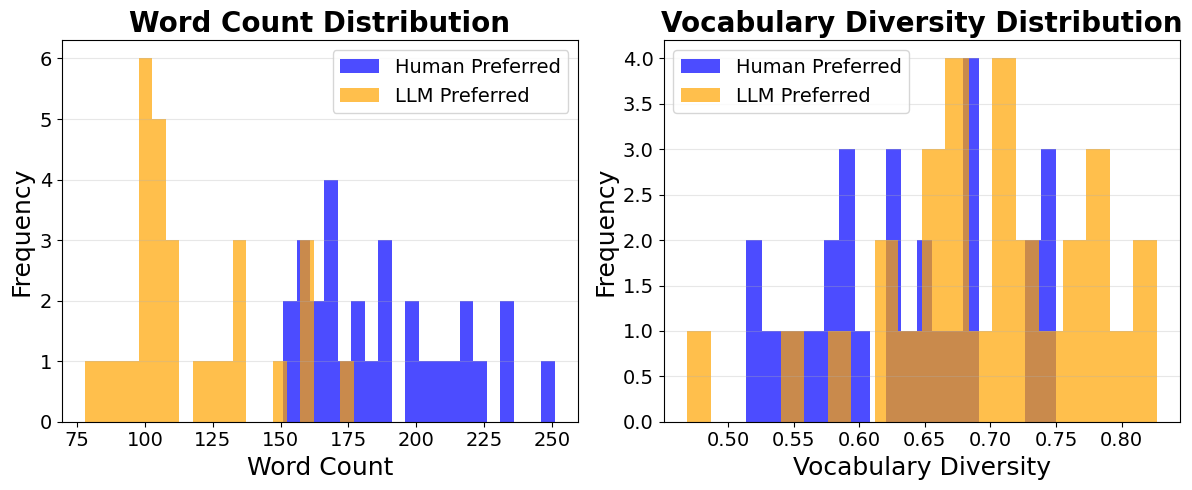

In [55]:
# ============================================================================
# VISUALIZATION: Comparative Patterns
# ============================================================================

# Create visualizations comparing human vs LLM preferences
fig, axes = plt.subplots(1,2,figsize=(12, 5))

# 1. Word Count Distribution
human_word_counts = [human_lexical[t]['word_count'] for t in human_lexical.keys()]
llm_word_counts = [llm_lexical[t]['word_count'] for t in llm_lexical.keys()]

axes[0].hist(human_word_counts, bins=20, alpha=0.7, label='Human Preferred', color='blue')
axes[0].hist(llm_word_counts, bins=20, alpha=0.7, label='LLM Preferred', color='orange')
axes[0].set_xlabel('Word Count', fontsize=18)
axes[0].set_ylabel('Frequency', fontsize=18)
axes[0].set_title('Word Count Distribution', fontsize=20, fontweight='bold')
axes[0].legend(fontsize=14)
axes[0].grid(axis='y', alpha=0.3)

# 2. Vocabulary Diversity
human_vocab = [human_lexical[t]['vocab_diversity'] for t in human_lexical.keys()]
llm_vocab = [llm_lexical[t]['vocab_diversity'] for t in llm_lexical.keys()]

axes[1].hist(human_vocab, bins=20, alpha=0.7, label='Human Preferred', color='blue')
axes[1].hist(llm_vocab, bins=20, alpha=0.7, label='LLM Preferred', color='orange')
axes[1].set_xlabel('Vocabulary Diversity', fontsize=18)
axes[1].set_ylabel('Frequency', fontsize=18)
axes[1].set_title('Vocabulary Diversity Distribution', fontsize=20, fontweight='bold')
axes[1].legend(fontsize=14)
axes[1].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='both', labelsize=14)
axes[1].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()

In [22]:
# ============================================================================
# SUMMARY STATISTICS AND INSIGHTS
# ============================================================================

print("=" * 100)
print("KEY INSIGHTS: Human vs LLM Judge Preferences")
print("=" * 100)

# Calculate summary statistics
print("\n1. LEXICAL PATTERNS:")
print(f"   - Human-preferred responses use {comparison_stats['word_count']['human_mean']:.1f} words on average")
print(f"   - LLM-preferred responses use {comparison_stats['word_count']['llm_mean']:.1f} words on average")
print(f"   - Difference: {comparison_stats['word_count']['relative_diff_pct']:+.1f}%")

print(f"\n   - Human-preferred vocabulary diversity: {comparison_stats['vocab_diversity']['human_mean']:.3f}")
print(f"   - LLM-preferred vocabulary diversity: {comparison_stats['vocab_diversity']['llm_mean']:.3f}")
print(f"   - Difference: {comparison_stats['vocab_diversity']['relative_diff_pct']:+.1f}%")

print(f"\n   - Human-preferred avg sentence length: {comparison_stats['avg_sentence_length']['human_mean']:.1f} words")
print(f"   - LLM-preferred avg sentence length: {comparison_stats['avg_sentence_length']['llm_mean']:.1f} words")
print(f"   - Difference: {comparison_stats['avg_sentence_length']['relative_diff_pct']:+.1f}%")

print("\n2. STRUCTURAL PATTERNS:")
print(f"   - Human-preferred responses have {comparison_stats['paragraph_count']['human_mean']:.1f} paragraphs on average")
print(f"   - LLM-preferred responses have {comparison_stats['paragraph_count']['llm_mean']:.1f} paragraphs on average")
print(f"   - Difference: {comparison_stats['paragraph_count']['relative_diff_pct']:+.1f}%")

print(f"\n   - Human-preferred use bullets/lists: {comparison_stats['bullet_count']['human_mean']:.1f} on average")
print(f"   - LLM-preferred use bullets/lists: {comparison_stats['bullet_count']['llm_mean']:.1f} on average")

# Boolean features
print("\n3. FORMATTING PREFERENCES:")
for feat in boolean_features:
    if feat in comparison_stats:
        human_pct = comparison_stats[feat]['human_pct']
        llm_pct = comparison_stats[feat]['llm_pct']
        feat_name = feat.replace('has_', '').replace('_', ' ').title()
        print(f"   - {feat_name}: Human {human_pct:.1f}% vs LLM {llm_pct:.1f}%")

print("\n4. VOCABULARY PREFERENCES:")
human_favored = distinctive_words_df[distinctive_words_df['preference'] == 'human'].head(5)
llm_favored = distinctive_words_df[distinctive_words_df['preference'] == 'llm'].head(5)

print(f"   - Top words in human-preferred: {', '.join(human_favored['word'].tolist())}")
print(f"   - Top words in LLM-preferred: {', '.join(llm_favored['word'].tolist())}")

# # Export detailed results
# analysis_output = {
#     'summary': {
#         'human_top_prompts': human_top_prompts,
#         'llm_top_prompts': llm_top_prompts,
#         'common_terms_analyzed': len(set(human_preferred.keys()) & set(llm_preferred.keys()))
#     },
#     'comparative_statistics': comparison_stats,
#     'distinctive_vocabulary': distinctive_words_df.head(50).to_dict('records'),
#     'human_preferred_samples': {k: {'prompt': v['prompt'], 'word_count': len(v['explanation'].split())} 
#                                 for k, v in list(human_preferred.items())[:10]},
#     'llm_preferred_samples': {k: {'prompt': v['prompt'], 'word_count': len(v['explanation'].split())} 
#                               for k, v in list(llm_preferred.items())[:10]}
# }

# output_file = "../result/human_vs_llm_pattern_analysis.json"
# with open(output_file, 'w', encoding='utf-8') as f:
#     json.dump(analysis_output, f, indent=2, ensure_ascii=False)

# print(f"\n✅ Detailed analysis saved to: {output_file}")

KEY INSIGHTS: Human vs LLM Judge Preferences

1. LEXICAL PATTERNS:
   - Human-preferred responses use 187.8 words on average
   - LLM-preferred responses use 116.7 words on average
   - Difference: +60.9%

   - Human-preferred vocabulary diversity: 0.633
   - LLM-preferred vocabulary diversity: 0.696
   - Difference: -9.1%

   - Human-preferred avg sentence length: 22.0 words
   - LLM-preferred avg sentence length: 26.3 words
   - Difference: -16.2%

2. STRUCTURAL PATTERNS:
   - Human-preferred responses have 5.0 paragraphs on average
   - LLM-preferred responses have 3.2 paragraphs on average
   - Difference: +57.0%

   - Human-preferred use bullets/lists: 6.1 on average
   - LLM-preferred use bullets/lists: 2.9 on average

3. FORMATTING PREFERENCES:
   - Colon Separators: Human 100.0% vs LLM 89.7%
   - Dashes: Human 44.8% vs LLM 37.9%
   - Parentheses: Human 100.0% vs LLM 62.1%
   - Code Notation: Human 24.1% vs LLM 10.3%
   - Questions: Human 17.2% vs LLM 10.3%
   - Emphasis: Human 